In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot  as plt
from matplotlib.colors import ListedColormap

In [2]:
df=pd.read_csv('C:\\Users\\Admin\\Downloads\\name_gender.csv',names=['names','sex','num'])
df.head()

,names,sex,num
0,Aaban,M,1.0
1,Aabha,F,1.0
2,Aabid,M,1.0
3,Aabriella,F,1.0
4,Aada,F,1.0


In [3]:
df.shape

(95025, 3)

In [4]:
df.isnull().sum()

names    0
sex      0
num      0
dtype: int64

In [5]:
df.drop(['num'],axis=1,inplace=True)

In [6]:
df.head()

,names,sex
0,Aaban,M
1,Aabha,F
2,Aabid,M
3,Aabriella,F
4,Aada,F


In [7]:
df.size

190050

In [8]:
df.dtypes

names    object
sex      object
dtype: object

In [9]:
df[df.sex=='F'].size


120608

In [10]:
df[df.sex=='M'].size

69442

In [11]:
df.sex.replace({'F':0,'M':1},inplace=True)

In [12]:
df.head()

,names,sex
0,Aaban,1
1,Aabha,0
2,Aabid,1
3,Aabriella,0
4,Aada,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95025 entries, 0 to 95024
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   names   95025 non-null  object
 1   sex     95025 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [14]:
df['sex'].value_counts()

0    60304
1    34721
Name: sex, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

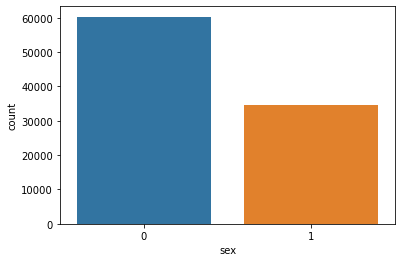

In [15]:
sns.countplot(df['sex'])

In [16]:
df.describe()

,sex
count,95025.000000
mean,0.365388
std,0.481541
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [19]:
Xfeatures =df['names']

In [20]:
# Feature Extraction 
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [21]:
cv.get_feature_names()

['aaban',
 'aabha',
 'aabid',
 'aabriella',
 'aada',
 'aadam',
 'aadan',
 'aadarsh',
 'aaden',
 'aadesh',
 'aadhav',
 'aadhavan',
 'aadhi',
 'aadhira',
 'aadhvik',
 'aadhya',
 'aadhyan',
 'aadi',
 'aadian',
 'aadil',
 'aadin',
 'aadish',
 'aadison',
 'aadit',
 'aadith',
 'aadithya',
 'aaditri',
 'aaditya',
 'aadiv',
 'aadon',
 'aadrian',
 'aadrika',
 'aadrit',
 'aadvik',
 'aadvika',
 'aadya',
 'aadyn',
 'aafia',
 'aafreen',
 'aagam',
 'aage',
 'aagot',
 'aahaan',
 'aahan',
 'aahana',
 'aahil',
 'aahir',
 'aahliyah',
 'aahna',
 'aahron',
 'aaidan',
 'aaiden',
 'aaidyn',
 'aaila',
 'aailiyah',
 'aailyah',
 'aaima',
 'aaira',
 'aairah',
 'aaisha',
 'aaishah',
 'aaiyana',
 'aaiza',
 'aaja',
 'aajah',
 'aajaylah',
 'aajon',
 'aakanksha',
 'aakarsh',
 'aakash',
 'aakeem',
 'aakilah',
 'aakira',
 'aakiyah',
 'aakriti',
 'aala',
 'aalaiya',
 'aalaiyah',
 'aalana',
 'aalanah',
 'aalani',
 'aalap',
 'aalaya',
 'aalayah',
 'aalayiah',
 'aalayjah',
 'aalayna',
 'aalaysha',
 'aalaysia',
 'aalea',
 

In [22]:
from sklearn.model_selection import train_test_split
# Features 
X
# Labels
y = df.sex

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
# Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)


0.6328645683854714

In [25]:
# Accuracy of our Model
print("Accuracy of Model",clf.score(X_test,y_test)*100,"%")

Accuracy of Model 63.286456838547146 %


In [26]:
# Accuracy of our Model
print("Accuracy of Model",clf.score(X_train,y_train)*100,"%")

Accuracy of Model 100.0 %


In [27]:
## sample prediction
sample_name=['mary']
vect=cv.transform(sample_name).toarray() ## female is 0 and male is 1
vect

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [51]:
def genderpredictor(a):
    test_name=[a]
    vector=cv.transform(test_name).toarray()
    if clf.predict(vector)==0:
        print('female')
    else:
         print('male')

In [52]:
genderpredictor('Martha')

female


In [53]:
namelist=['Mary','Mike','Nike']
for i in namelist:
    print(genderpredictor(i))

female
None
female
None
female
None


In [54]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
y_pred = classifier.predict(X_test)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19846     0]
 [11513     0]]
              precision    recall  f1-score   support

           0       0.63      1.00      0.78     19846
           1       0.00      0.00      0.00     11513

    accuracy                           0.63     31359
   macro avg       0.32      0.50      0.39     31359
weighted avg       0.40      0.63      0.49     31359



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
